Examples of using the `pygravlens` code for gravitational lensing.

By Chuck Keeton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygravlens as gl

# Singular Isothermal Sphere (SIS) lens

Create an SIS lens at the origin with an Einstein radius of 1. Set up the model, compute the tiling, and plot. Here we use the default grid.

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


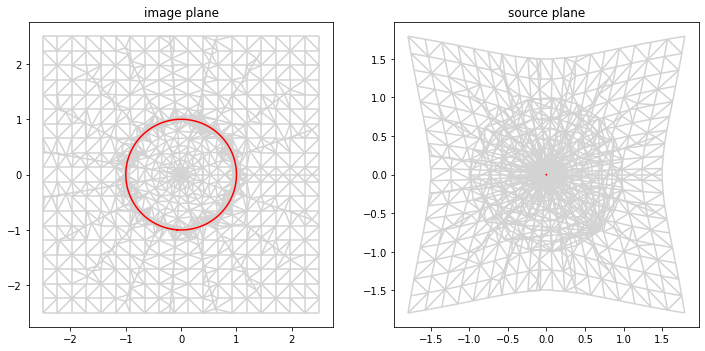

In [2]:
plane = gl.lensplane('SIS',[0.0,0.0,1.0])
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot(plotgrid=True,plotcrit='red')

Change the gridding.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


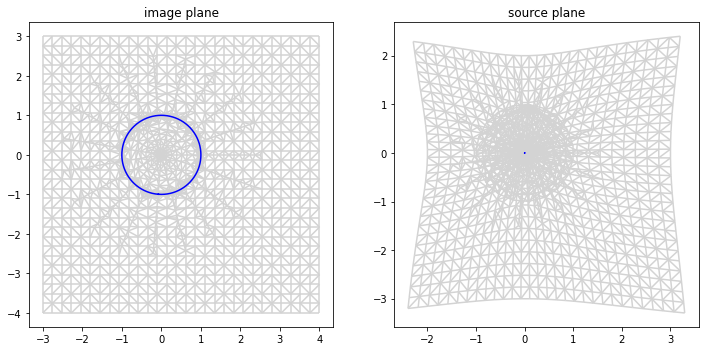

In [3]:
model.maingrid(-3.0,4.0,30,-4.0,3.0,30)
model.tile()
model.plot(plotgrid=True,plotcrit='blue')

Solve the lens equation for a sample source.

In [4]:
imgarr,muarr = model.findimg([0.6,0.0])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)

positions
[[ 1.60000000e+00 -8.36352002e-08]
 [-4.00000007e-01 -7.44999667e-09]]
magnifications
[ 2.66666666 -0.66666669]


In [5]:
srcarr = [[0.6,0.2],[-0.3,0.3],[-0.2,-0.5]]
imgarr,muarr = model.findimg(srcarr)
for i in range(len(srcarr)):
    print('source',srcarr[i])
    print('images',imgarr[i])
    print('magnifications',muarr[i])
    print('')

source [0.6, 0.2]
images [[ 1.5486831   0.51622846]
 [-0.34868331 -0.11622778]]
magnifications [ 2.58113875 -0.58113887]

source [-0.3, 0.3]
images [[-1.00710563  1.0071079 ]
 [ 0.40710674 -0.40710678]]
magnifications [ 3.35702274 -1.35702243]

source [-0.2, -0.5]
images [[ 0.17139067  0.42847668]
 [-0.57139053 -1.42847632]]
magnifications [-0.85695334  2.85695475]



We can include a source when plotting. Here the source and images are plotted in red.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


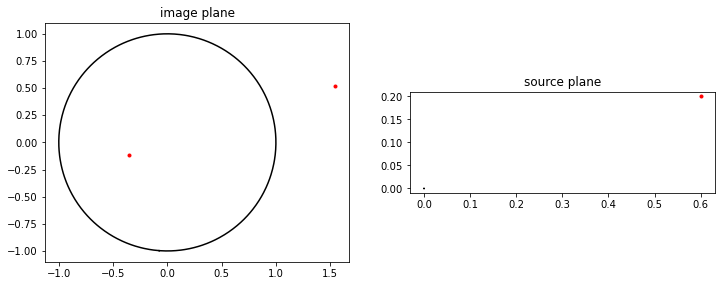

In [6]:
model.plot(src=[0.6,0.2])

We can even include multiple sources. Here each source/image set is a different color.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


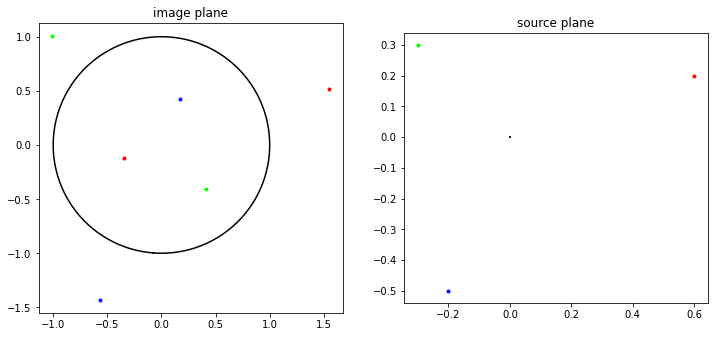

In [7]:
model.plot(src=[[0.6,0.2],[-0.3,0.3],[-0.2,-0.5]])

# SIS with external shear

Take the same SIS as before and add external shear to break the symmetry. Shear can be specified as a combination of `gammac` (stretching aligned with the axes) or `gammas` (stretching along the 45-deg diagonals).

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


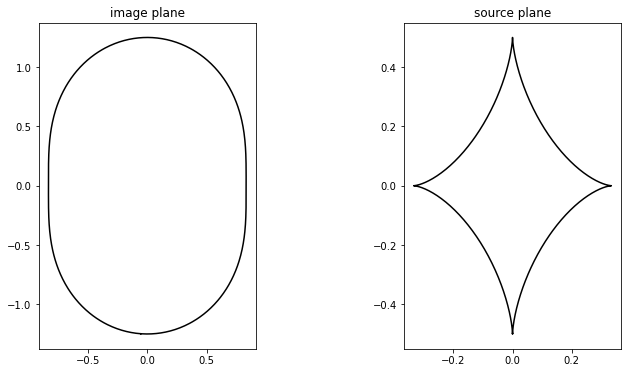

In [8]:
plane = gl.lensplane('SIS',[0.0,0.0,1.0],gammac=0.2)
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Solve the lens equation for a sample source.

In [9]:
imgarr,muarr = model.findimg([0.1,0.1])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)

positions
[[-0.18582012 -0.72382655]
 [-1.07075954  0.32614927]
 [ 1.36020108  0.21118409]
 [-0.35362109  0.85315924]]
magnifications
[-1.63214569  4.65232177  2.6883539  -3.62519488]


We can include a source when plotting. Here the source and images are plotted in red.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


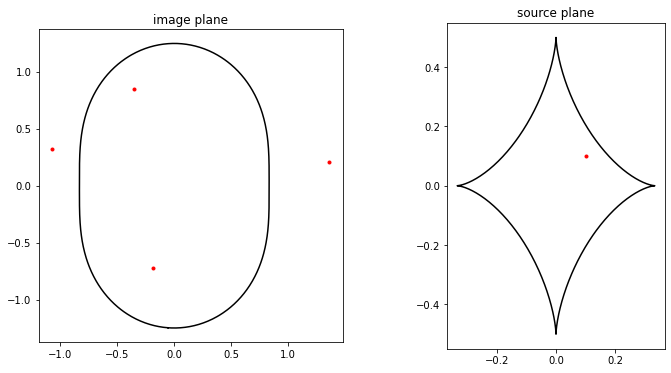

In [10]:
model.plot(src=[0.1,0.1])

We can even include multiple sources. Here each source/image set is a different color.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


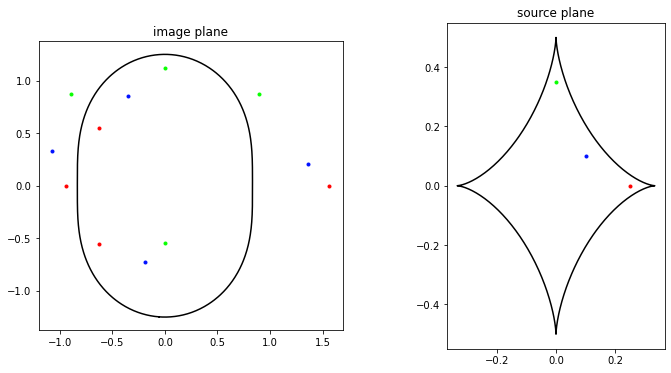

In [11]:
model.plot(src=[[0.25,0.0],[0.0,0.35],[0.1,0.1]])

# Point mass lens

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


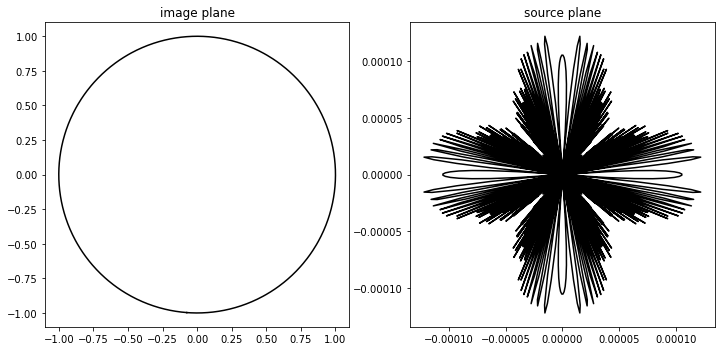

In [12]:
plane = gl.lensplane('ptmass',[0.0,0.0,1.0])
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Note: the strange features in the source plane are caused by numerical noise.

In [13]:
model.findimg([0.5,0.0])

(array([[ 1.28077644e+00, -6.80180649e-07],
        [-7.80776406e-01,  1.51843715e-08]]),
 array([ 1.59141021, -0.59141031]))

# Point mass binary

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:94: RuntimeWarning: invalid value encountered in true_divide
  cost = dx[:,0]/r
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:95: RuntimeWarning: invalid value encountered in true_divide
  sint = dx[:,1]/r
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:101: RuntimeWarning: divide by zero encountered in true_divide
  phir_r = thetaE**2/r**2
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:103: RuntimeWarning: invalid value encountered in multiply
  phixx  = phir_r*sint*sint + phirr*cost*cost
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:104: RuntimeWarning: invalid value encountered in multiply
  phiyy  = phir_r*cost*cost + phirr*sint*sint
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:105: RuntimeWarning: invalid value encountered in multiply
  phixy  = (phirr-phir_r)*sint*cost
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:107: RuntimeWarning: invalid value encountered in multiply
  alpha += np.ar

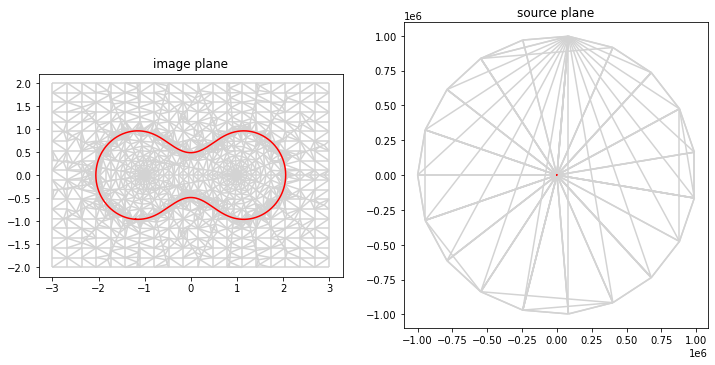

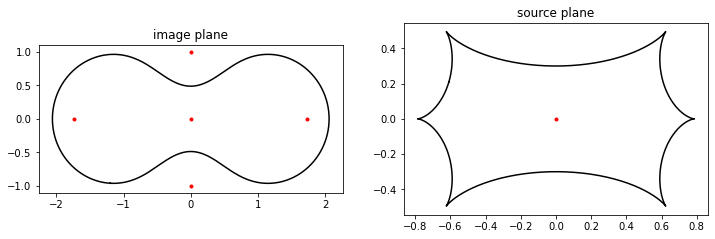

In [14]:
plane = gl.lensplane('ptmass',[[-1.0,0.0,1.0],[1.0,0.0,1.0]])
model = gl.lensmodel([plane])
model.maingrid(-3,3,20,-2,2,20)
model.galgrid(1.0e-6,2.0,20,20)
model.tile()
model.plot(plotgrid=True,plotcrit='red')
model.plot(src=[0,0])

Let's reproduce Figs. 5.2 and 5.3 in the book by Congdon & Keeton (https://link.springer.com/book/10.1007/978-3-030-02122-1).

Equal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-G

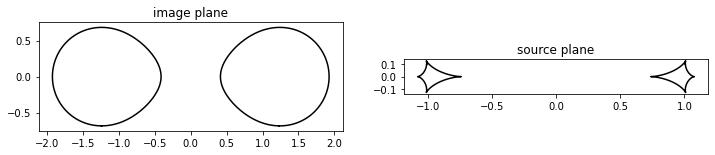

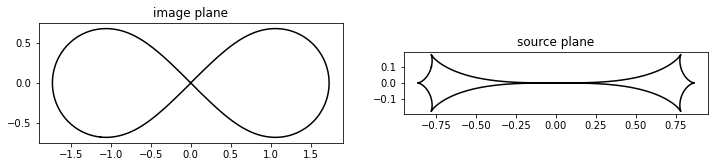

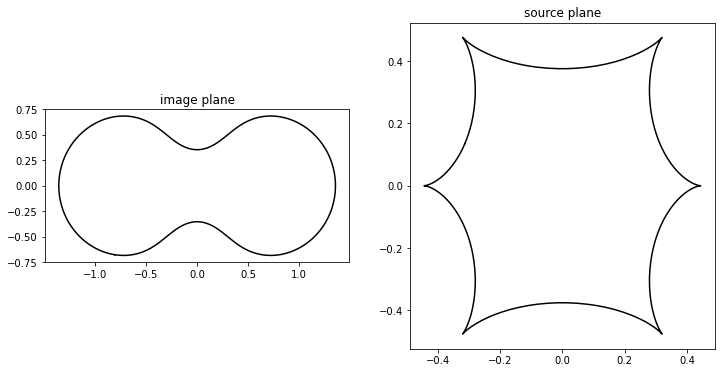

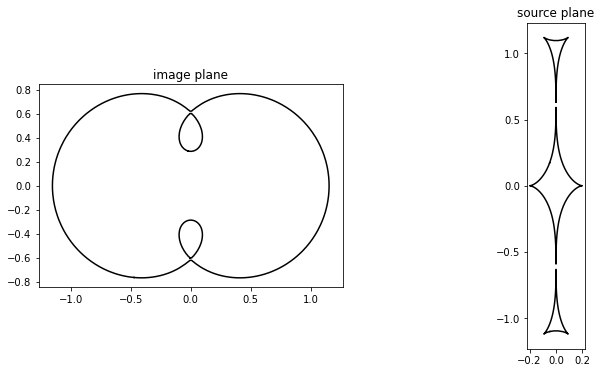

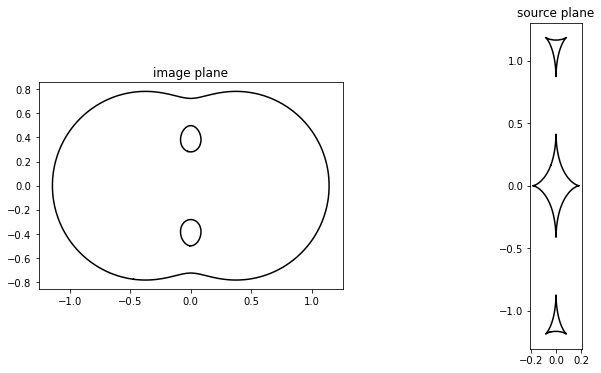

In [15]:
m1 = 0.5
m2 = 0.5

for d in (2.4, 2.0, 1.2, 0.707, 0.68):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()

Unequal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:885: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-G

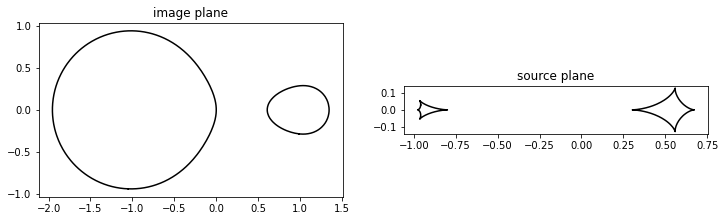

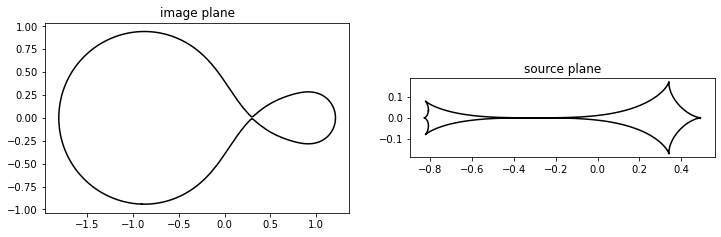

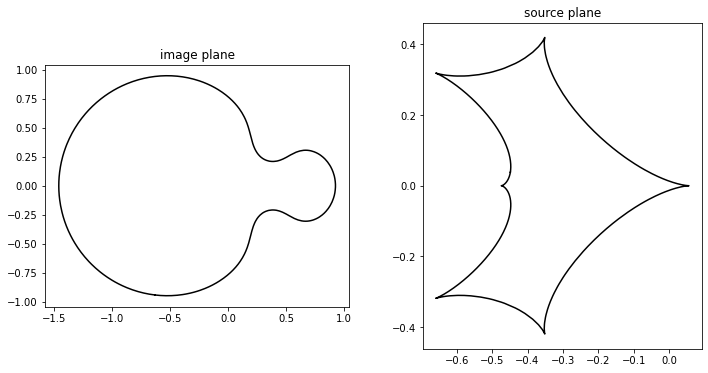

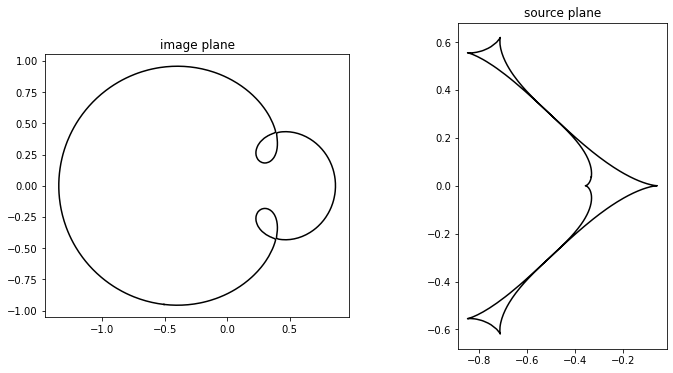

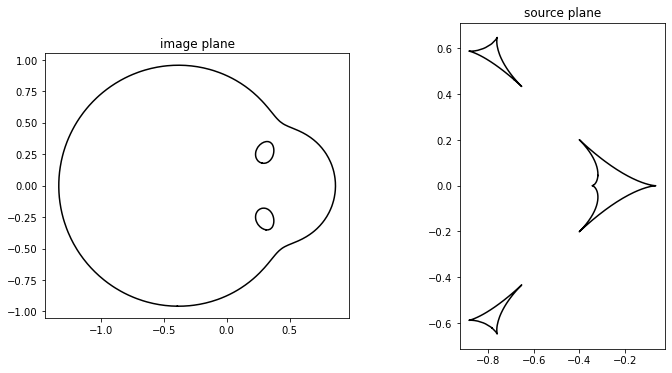

In [16]:
m1 = 0.1
m2 = 0.9

for d in (2.0, 1.709, 1.0, 0.765, 0.74):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()